Orbits for all Asteroids in the MPC Database (MPCORB_extended.json.gz).

https://www.minorplanetcenter.net/data 

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
url = r'C:\Users\rrp\Documents\ox-p4ds\notebooks\Asteroidproject\nea\nea_extended.json'
df = pd.read_json(url,orient = 'columns')

## Feature Analysis

In [4]:
# Lool for row counts with nullvalues for each column
df.isna().sum()

Aphelion_dist                             0
Arc_length                             6405
Arc_years                             13090
Computer                                  0
Critical_list_numbered_object_flag    18907
Epoch                                     0
G                                         2
H                                         2
Hex_flags                                 0
Last_obs                                  0
M                                         0
NEO_flag                                345
Name                                  19336
Node                                      0
Num_obs                                   0
Num_opps                                  0
Number                                16703
One_km_NEO_flag                       18118
One_opposition_object_flag             7767
Orbit_type                                0
Orbital_period                            0
Other_desigs                          19446
PHA_flag                        

In [5]:
#Check if there are any rows with both Arc_years and Arc_length are empty. Per the results, there are no rows with both values empty
Arc_df = pd.DataFrame(df.query("Arc_years== 'NaN' and Arc_length=='NaN'"))
Arc_df

,Aphelion_dist,Arc_length,Arc_years,Computer,Critical_list_numbered_object_flag,Epoch,G,H,Hex_flags,Last_obs,M,NEO_flag,Name,Node,Num_obs,Num_opps,Number,One_km_NEO_flag,One_opposition_object_flag,Orbit_type,Orbital_period,Other_desigs,PHA_flag,Peri,Perihelion_dist,Perturbers,Perturbers_2,Principal_desig,Ref,Semilatus_rectum,Synodic_period,Tp,U,a,e,i,n,rms


In [3]:
#Lets look at the 
#G_df = pd.DataFrame(df.query("G== 'NaN'"))
#Gold_df = df.groupby(['Orbit_type'])['Computer'].count().reset_index(name = 'Original')
#Gnan_df = G_df.groupby(['Orbit_type'])['Computer'].count().reset_index(name = 'NaN')
#temp=Gold_df.merge(Gnan_df,how = 'inner', on = 'Orbit_type')
#temp

#### After looking at the data, my observation on some fields are as below:

Columns that can be dropped:
Computer - I beleive it is the name of the computer which has provided the information, not a required field,hence can be omitted.
Hex flag - this column can be dropped out, as the values are decoded and given as independent columns.

Name,Number,Other_desigs - Change value to '0', if absent.
Critical list numbered object flag - if value is absent, set it to 0
NEO_flag - if value is absent, set it to 0
One_km_NEO_flag - if value is absent, set it to 0
PHA_flag - if value is absent, set it to 0
One_opposition_object_flag - if value is absent, set it to 0


Arc_years - Only present for multi-opposition orbits .
Arc_length - Only present for single opposition orbits. There are no rows with both values as 'NaN'.
'G' and 'H' - We can drop rows that has NaN values for both 'G' and 'H'. The rows with NaN values are negligible compared to the total rows.


In [4]:
df= df.drop(['Computer','Hex_flags','Name','Number','Other_desigs'],axis= 1)


In [5]:
df['Critical_list_numbered_object_flag'].fillna(0,inplace = True)
df['NEO_flag'].fillna(0,inplace = True)
df['One_km_NEO_flag'].fillna(0,inplace = True)
df['PHA_flag'].fillna(0,inplace = True)
df['One_opposition_object_flag'].fillna(0,inplace = True)
df['Num_obs'].fillna(0,inplace = True)

#df.dropna(subset=['G','H'], how = 'all',inplace = True)

In [6]:
df.isna().sum()

Aphelion_dist                             0
Arc_length                             6405
Arc_years                             13090
Critical_list_numbered_object_flag        0
Epoch                                     0
G                                         2
H                                         2
Last_obs                                  0
M                                         0
NEO_flag                                  0
Node                                      0
Num_obs                                   0
Num_opps                                  0
One_km_NEO_flag                           0
One_opposition_object_flag                0
Orbit_type                                0
Orbital_period                            0
PHA_flag                                  0
Peri                                      0
Perihelion_dist                           0
Perturbers                               28
Perturbers_2                             28
Principal_desig                 

In [9]:
#Asteroid concentration in different orbits
orb_astDF = df.groupby(["Orbit_type"])['Ref'].count().reset_index(name = 'Total_Count')
orb_astDF_sorted=orb_astDF.sort_values(['Total_Count'],ascending = True)

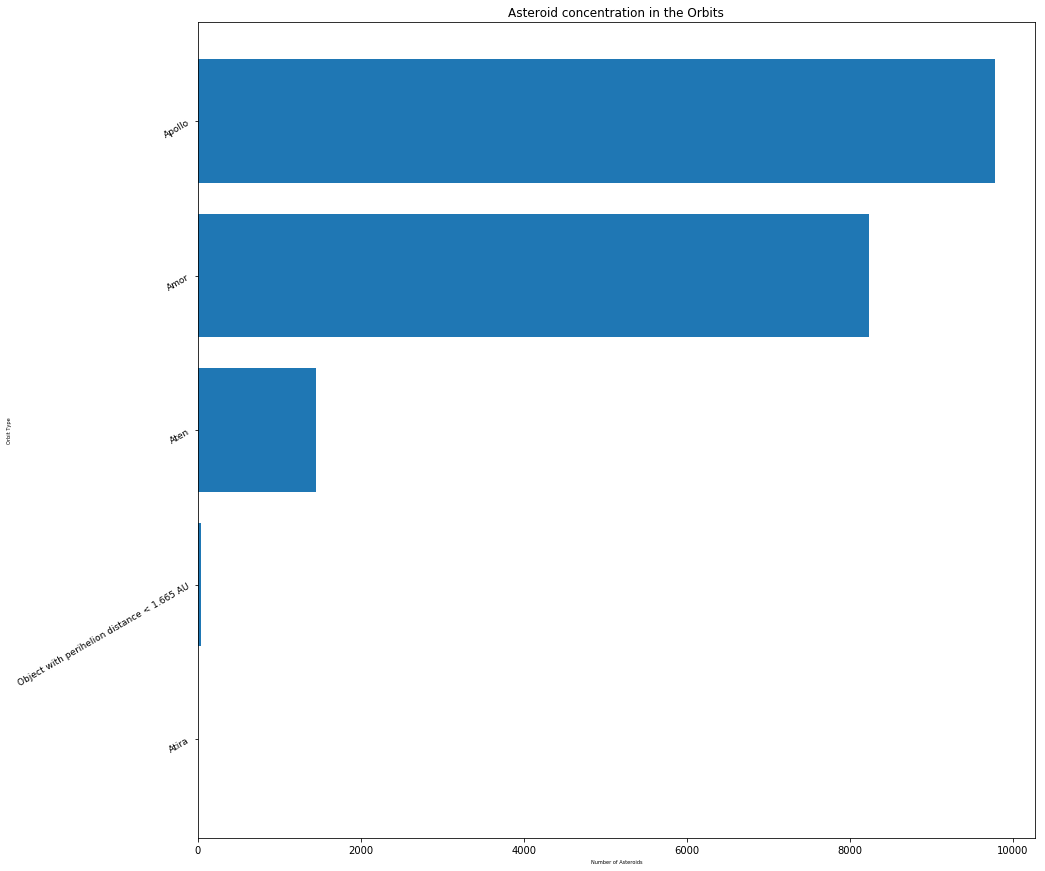

In [21]:
astLabel = orb_astDF_sorted['Orbit_type']
astData = orb_astDF_sorted['Total_Count']
index = np.arange(len(astLabel))
plt.figure(figsize=(15,15))
plt.barh(index, astData)

plt.ylabel('Orbit Type', fontsize=5)
plt.xlabel('Number of Asteroids', fontsize=5)
plt.yticks(index, astLabel, fontsize=9, rotation=30)
plt.title('Asteroid concentration in the Orbits')
plt.show()

The results above shows that 'Apollo' tops the list with highest concentrationof asteroids followed by 'Amor'.
'Atira' has the lowest concentration.

In [ ]:
#params = {'axes.titlesize':'32',
#          'xtick.labelsize':'24',
#          'ytick.labelsize':'24'}
#plt.rcParams.update(params)
#df.hist([figsize=(50, 30))
#plt.show()

### Potentially Hazardous Asteroids

In [23]:
#Finding the number of hazardous asteroids in the orbits
phaDF = df.loc[df["PHA_flag"]==1]

orb_phaDF= phaDF.groupby(["Orbit_type"])['Ref'].count().reset_index(name='PHACount')
 
temp=orb_phaDF.merge(orb_astDF,how = 'outer', on = 'Orbit_type')
temp

,Orbit_type,PHACount,Total_Count
0,Amor,190.0,8233
1,Apollo,1592.0,9781
2,Aten,159.0,1446
3,Object with perihelion distance < 1.665 AU,9.0,34
4,Atira,NaN,1


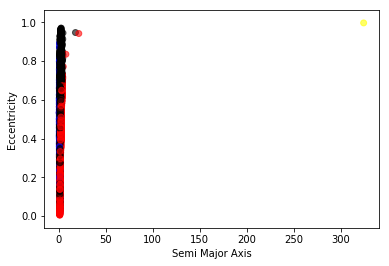

In [30]:
#pd.plotting.scatter_matrix(df[['n','a']])
# Semi Major axis - Object's distance from the sun.
#Eccentricty - describes the orbit shape
colors = {"Amor": "red", 
               "Apollo": "black",
               "Aten" : "blue",
              "Object with perihelion distance < 1.665 AU" : "purple",
              "Atira" : "yellow"
               }
plt.xlabel('Semi Major Axis')
plt.ylabel('Eccentricity')
#colors = df["Orbit_type"].map(lambda x: color_wheel.get(x))
plt.scatter(df['a'],df['e'],c=df["Orbit_type"].apply(lambda x: colors[x]),  alpha=0.6)
plt.show()

As we can see above, asteroids in 'Atira' orbits has a very higher SMA and eccentricity. High eccentricity means the orbit is more parabolical in shape. Let us remove asteroids in 'Atira' from the dataframe to get a closer relationship between SMA and eccentricity.

In [26]:
NoAtira_df =  df.loc[df["Orbit_type"]!='Atira']

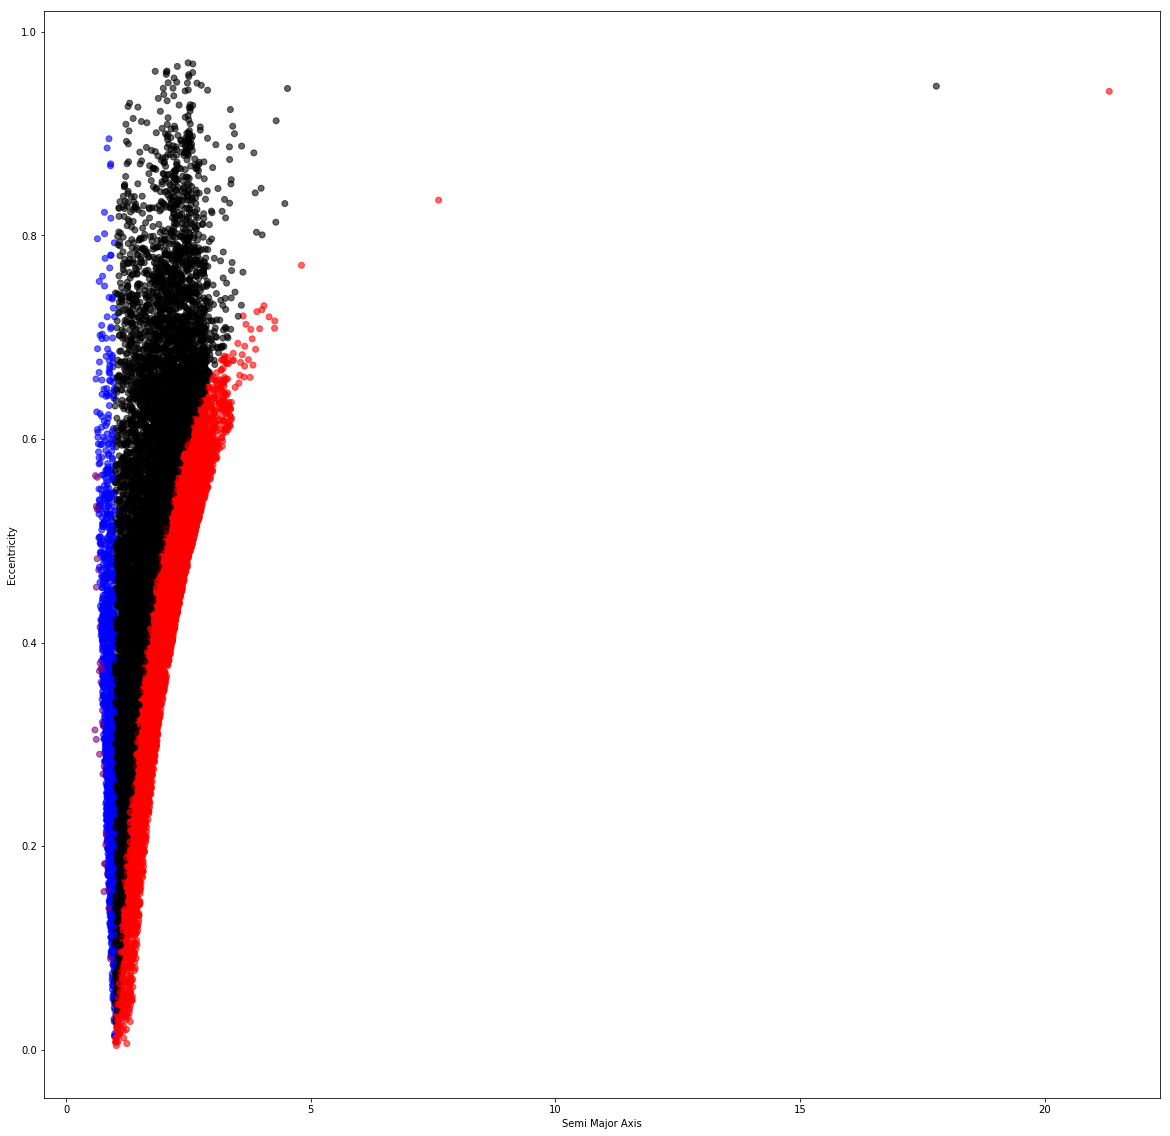

In [31]:

#colors = df["Orbit_type"].map(lambda x: color_wheel.get(x))

#plt.xticks(np.arange(min(NoAtira_df['a']), max(NoAtira_df['a'])+1, 2.0))
plt.figure(figsize=(20, 20))
plt.scatter(NoAtira_df['a'],NoAtira_df['e'],c=NoAtira_df["Orbit_type"].apply(lambda x: colors[x]), alpha=0.6)
plt.xlabel('Semi Major Axis')
plt.ylabel('Eccentricity')
plt.show()

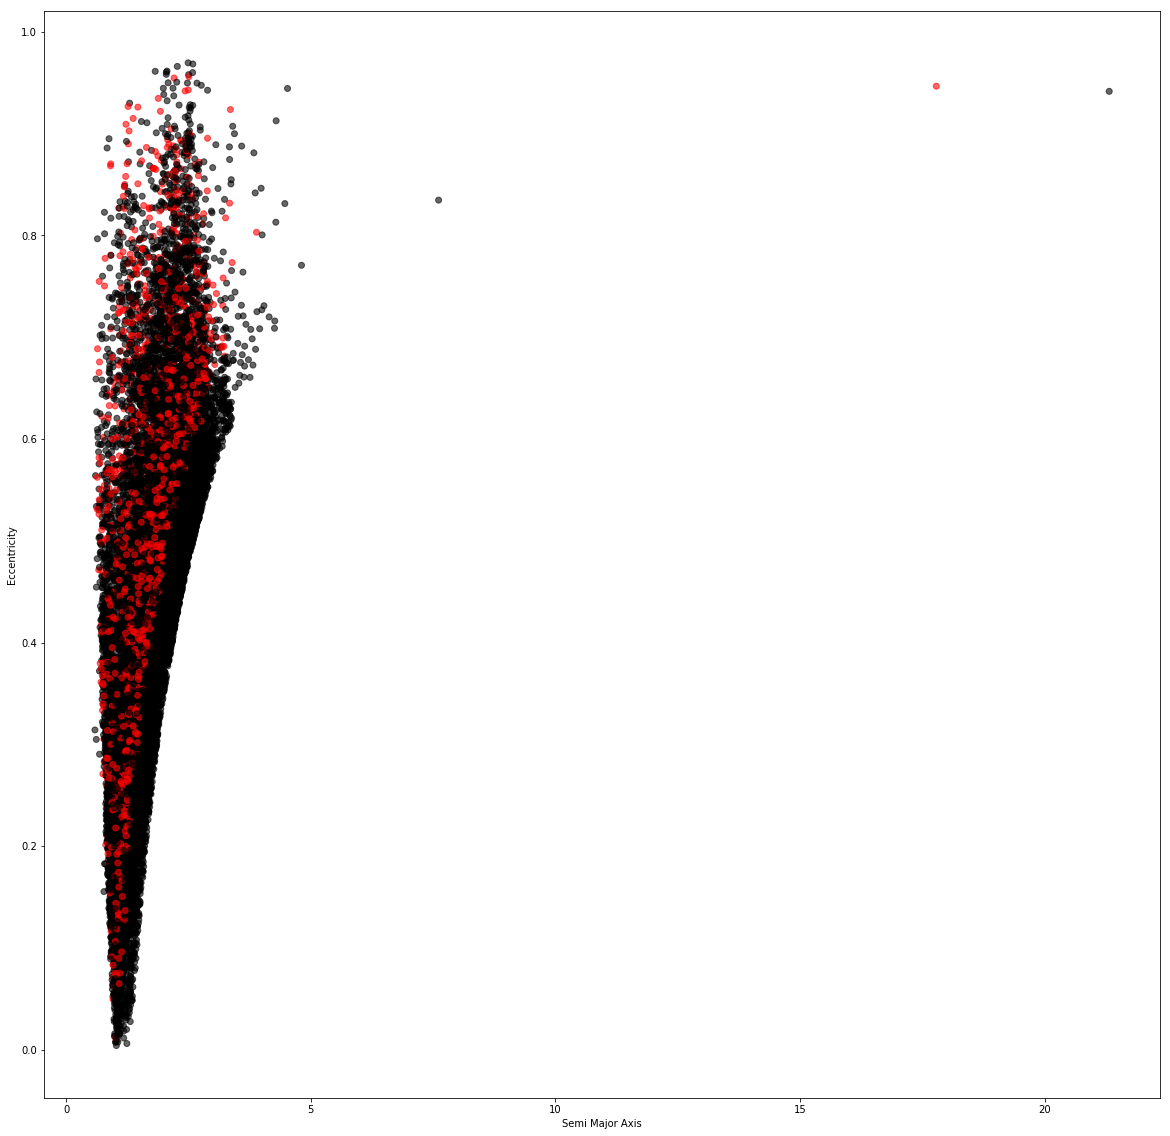

In [32]:
#Let us look at the above relation for PHA and non-PHA
colors = {1.0: "red", 
               0: "black",
               }
plt.figure(figsize=(20, 20))
plt.scatter(NoAtira_df['a'],NoAtira_df['e'],c=NoAtira_df["PHA_flag"].apply(lambda x: colors[x]), alpha=0.6)
plt.xlabel('Semi Major Axis')
plt.ylabel('Eccentricity')
plt.show()



As we can see above, semi major axis is lesser for PHA compared to non-PHA's

### Semi Major Axis and Eccentricity

In [34]:
#There is a moderately strong correlation between Semi Major axis and eccentricity . THere are outliers which has got SMA greater than 4AU.
#Let us look closely at asteroids with SMA < 4AU
#PHA asteroids
NoAtira_phadf = NoAtira_df.loc[(NoAtira_df["PHA_flag"] == 1.0) & (NoAtira_df["a"]<=4)]
#Non-PHA Asteroids
NoAtira_nphadf = NoAtira_df.loc[(NoAtira_df["PHA_flag"] == 0) & (NoAtira_df["a"]<=4)]

#We can use the LinerarRegression model from the sklearn Python package to build a linear regression model. First we fit the data. This trains the model based on the two variables, in this case n-PHA asteroids: eccentricity and PHA asteroids:mean daily motion
#This is for non-PHA asteroids.
lm_npha = linear_model.LinearRegression()
lm_npha.fit([[x] for x in NoAtira_nphadf.a], NoAtira_nphadf.e)
m = lm_npha.coef_[0]
b = lm_npha.intercept_
print("slope=", m, "intercept=", b)

slope= 0.20857130768368795 intercept= 0.06731533593183175


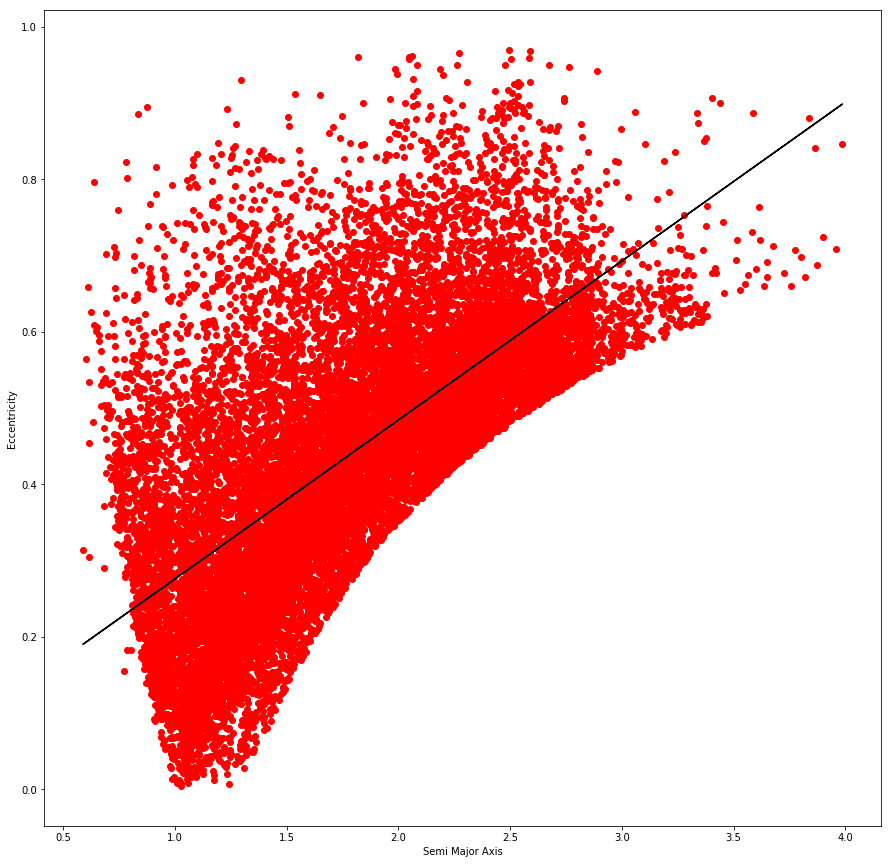

In [35]:
#To see how the linear model we trained on the PHA semimajor axis and eccentricity, we can plot the linear relationship over our scattergraph using the slope and intercept we extracted from our linear model lm_pha: 

plt.figure(figsize=(15, 15))
plt.scatter(x=NoAtira_nphadf.a, y=NoAtira_nphadf.e, c='red')
predicted_values_m = [lm_npha.coef_ * i + lm_npha.intercept_ for i in NoAtira_nphadf.a]

plt.xlabel("Semi Major Axis")
plt.ylabel("Eccentricity")

plt.plot(NoAtira_nphadf.a, predicted_values_m, 'black')


In [36]:
#Now we can use the above model to predict the values of 'e'.
p_e_npha = lm_npha.predict([[3.517355]])  
p_e_npha

array([0.80093467])

### Eccentricity and Mean Daily Motion

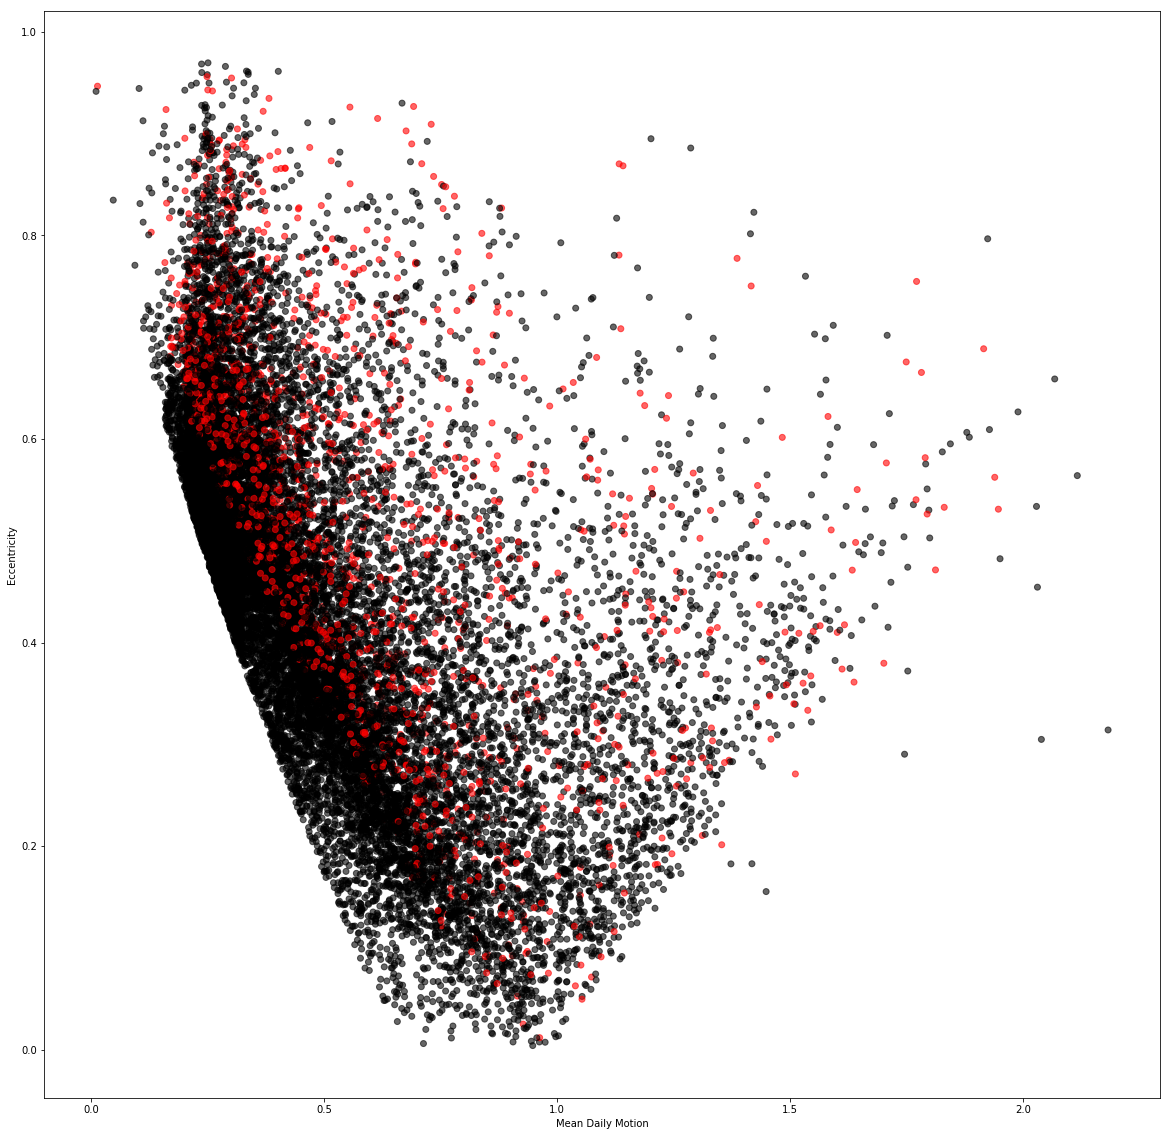

In [37]:
#Let us look at eccentricity and mean dailymotion(n) relation for PHA and non-PHA
colors = {1.0: "red", 
               0: "black",
               }
plt.figure(figsize=(20, 20))
plt.scatter(NoAtira_df['n'],NoAtira_df['e'],c=NoAtira_df["PHA_flag"].apply(lambda x: colors[x]), alpha=0.6)

plt.xlabel('Mean Daily Motion')
plt.ylabel('Eccentricity')
plt.show()

There is a moderately strong negative~ correlation between eccentricity and Mean Daily motion. Asteroids with more dailymean motion has more of a circular orbit. Seems that PHA asteroids with same eccentricity as non-PHA  has dailymean motion more compared to the non-PHA asteroids. There are outliers here, which are either PHA or non-PHA. Lets see below which orbit types they belongs to.

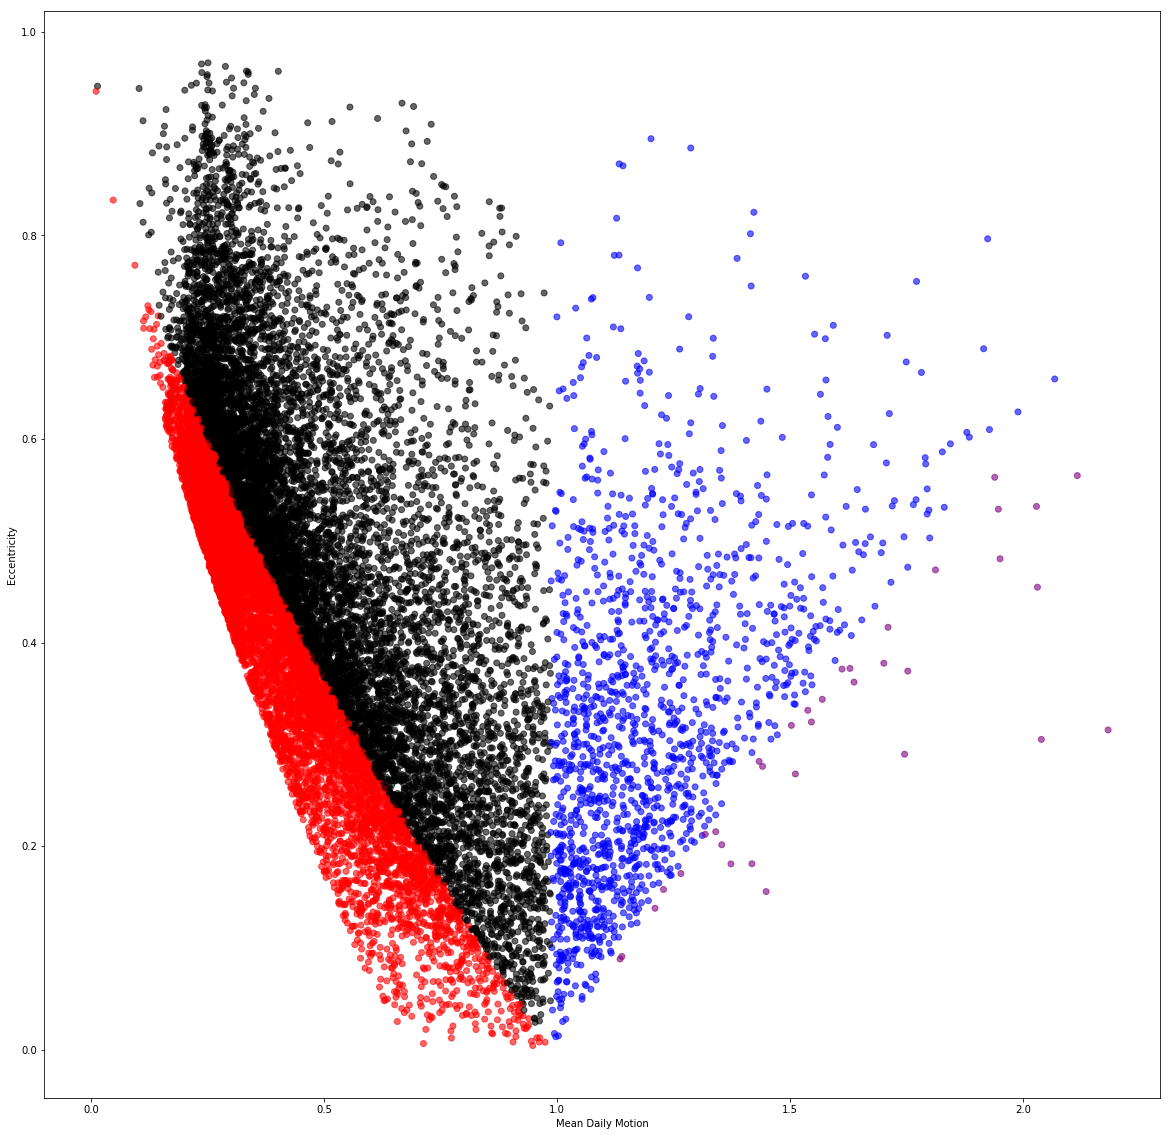

In [38]:
colors = {"Amor": "red", 
               "Apollo": "black",
               "Aten" : "blue",
              "Object with perihelion distance < 1.665 AU" : "purple",
              "Atira" : "yellow"
               }

plt.figure(figsize=(20, 20))
#colors = df["Orbit_type"].map(lambda x: color_wheel.get(x))
plt.scatter(NoAtira_df['n'],NoAtira_df['e'],c=NoAtira_df["Orbit_type"].apply(lambda x: colors[x]),  alpha=0.6)
plt.xlabel('Mean Daily Motion')
plt.ylabel('Eccentricity')
plt.show()

As we see above the outliers mostly belongs to 'Aten' and 'Object with perihelion distance less thatn 1.665AU'.
The mean daily motion forthose orbits starts at aminimum around 1.0 degrees perday.
Asteroids in 'Amor' are mostly non hazardous.
There is a moderately strong positive correlation exisitng in Amor and Apollo.
Whereas there a negative correlation that exists with Aten and Object with perihelion distance less thatn 1.665AU